# ポテンシャル分析

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)

In [2]:
sarsa_step_path = "/home/tokudo/Develop/research/dynamic-trajectory-aggregation/learning/fourrooms/out/sarsa_20220628_1707/steps/ConstStepFourrooms-v0-0-0.csv"
sarsa_detail_path = "/home/tokudo/Develop/research/dynamic-trajectory-aggregation/learning/fourrooms/out/sarsa_20220628_1707/detail/ConstStepFourrooms-v0-0-0.csv"
dta_step_path = "/home/tokudo/Develop/research/dynamic-trajectory-aggregation/learning/fourrooms/out/dta_20220628_1618/steps/ConstStepFourrooms-v0-0-0.csv"
dta_detail_path = "/home/tokudo/Develop/research/dynamic-trajectory-aggregation/learning/fourrooms/out/dta_20220628_1618/detail/ConstStepFourrooms-v0-0-0.csv"

In [3]:
sarsa_step_df = pd.read_csv(sarsa_step_path, header=None)
dta_step_df = pd.read_csv(dta_step_path, header=None)
detail_df = pd.read_csv(dta_detail_path, index_col=0)
sarsa_step_df.columns = ["SARSA"]
dta_step_df.columns = ["DTA"]

In [4]:
data_df = pd.concat([sarsa_step_df, dta_step_df], axis=1)

## 性能比較

<AxesSubplot:>

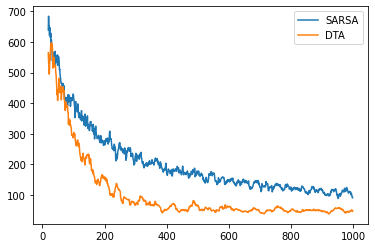

In [5]:
data_df.rolling(20).mean().plot()

## ポテンシャル

In [6]:
target_episodes = detail_df[detail_df["z"] == 2]["episode"].unique()

In [7]:
mean_vz = detail_df[detail_df["episode"].isin(target_episodes)].groupby(["episode", "z"]).agg({"v_z": "mean"})
mean_vz.sort_index(inplace=True, ascending=True)
mean_vz

v_z
episode z           
0       0  -0.000660
        1   0.000000
        2   0.000000
1       0  -0.200793
        1  -0.200000
...              ...
996     1 -13.082796
        2  -1.174334
998     0 -16.636892
        1 -13.117324
        2  -1.172591

[867 rows x 1 columns]

In [8]:
for idx in mean_vz.index.levels[0]:
    # print(mean_vz.loc[idx, "v_z"].diff())
    mean_vz.loc[idx, "diffs"] = mean_vz.loc[idx, "v_z"].diff().values
    mean_vz.loc[idx, "pct_changes"] = mean_vz.loc[idx, "v_z"].pct_change().values

In [9]:
mean_vz.loc[:, "pct_changes"] = mean_vz.loc[:, "pct_changes"] + 1
mean_vz.tail(50)

v_z      diffs  pct_changes
episode z                                   
937     1 -13.324467   3.337328     0.799702
        2  -1.202701  12.121766     0.090263
938     0 -16.661402        NaN          NaN
        1 -13.304136   3.357266     0.798500
        2  -1.200674  12.103462     0.090248
940     0 -16.668868        NaN          NaN
        1 -13.364393   3.304475     0.801758
        2  -1.198667  12.165726     0.089691
944     0 -16.706026        NaN          NaN
        1 -13.372962   3.333064     0.800487
        2  -1.196680  12.176281     0.089485
946     0 -16.693831        NaN          NaN
        1 -13.360612   3.333220     0.800332
        2  -1.194714  12.165898     0.089421
951     0 -16.746885        NaN          NaN
        1 -13.295681   3.451204     0.793920
        2  -1.192766  12.102915     0.089711
952     0 -16.762738        NaN          NaN
        1 -13.275592   3.487146     0.791970
        2  -1.190839  12.084753     0.089701
954     0 -16.781535        NaN          NaN
        1 -13.235850   3.545685     0.788715
        2  -1.188930  12.046919     0.089827
956     0 -16.807965        NaN          NaN
        1 -13.239428   3.568537     0.787688
        2  -1.187041  12.052387     0.089660
958     0 -16.812313        NaN          NaN
        1 -13.200026   3.612287     0.785140
        2  -1.185171  12.014855     0.089785
966     0 -16.805278        NaN          NaN
        1 -13.136634   3.668644     0.781697
        2  -1.183319  11.953315     0.090078
968     0 -16.795214        NaN          NaN
        1 -13.098239   3.696975     0.779879
        2  -1.181486  11.916753     0.090202
980     0 -16.644715        NaN          NaN
        1 -13.048653   3.596062     0.783952
        2  -1.179671  11.868982     0.090406
989     0 -16.643482        NaN          NaN
        1 -13.039475   3.604007     0.783458
        2  -1.177874  11.861600     0.090331
991     0 -16.638815        NaN          NaN
        1 -13.074442   3.564373     0.785780
        2  -1.176095  11.898347     0.089954
996     0 -16.668659        NaN          NaN
        1 -13.082796   3.585863     0.784874
        2  -1.174334  11.908462     0.089762
998     0 -16.636892        NaN          NaN
        1 -13.117324   3.519567     0.788448
        2  -1.172591  11.944733     0.089393